<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/AnujKrishnaPhuyal/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer


In [ ]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df


,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
cols = ["id","clump_thickness","cell_size_uniformity","cell_shape_uniformity","marginal_adhesion",
        "Single_Epithelial_Cell_Size","Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoi","Mitoses","Class"]

In [ ]:
df =pd.read_csv("breast-cancer-wisconsin.data",names =cols)
df

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
dd= df[["id","clump_thickness","Class"]]
dd


,id,clump_thickness,Class
0,1000025,5,2
1,1002945,5,2
2,1015425,3,2
3,1016277,6,2
4,1017023,4,2
...,...,...,...
694,776715,3,2
695,841769,2,2
696,888820,5,4
697,897471,4,4


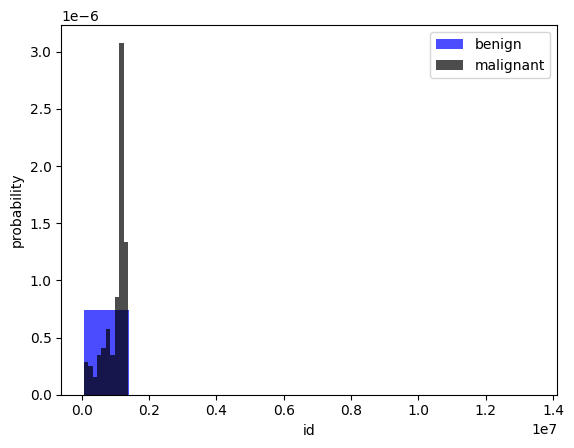

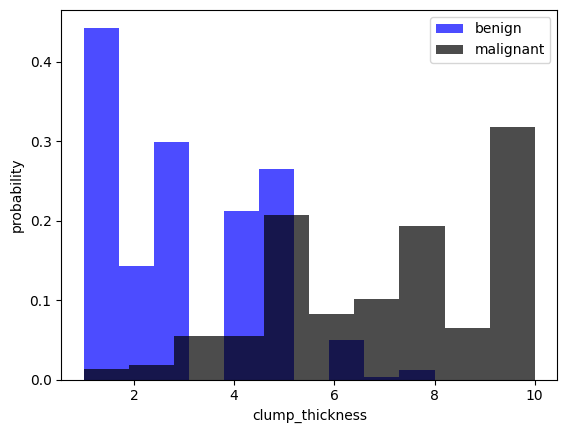

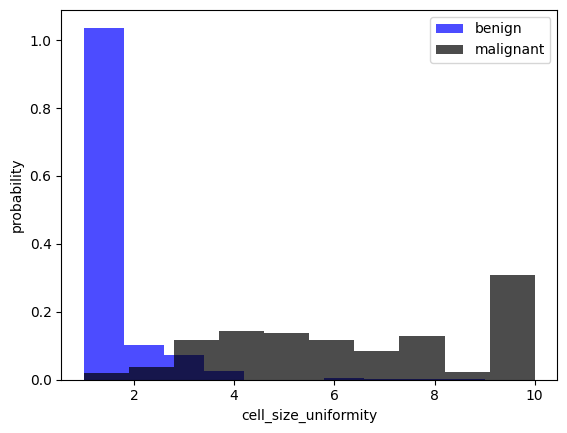

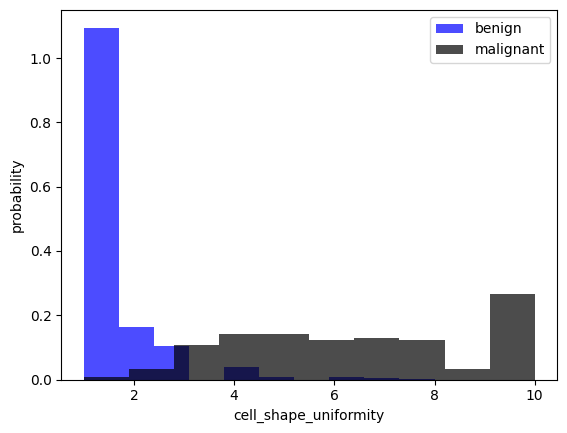

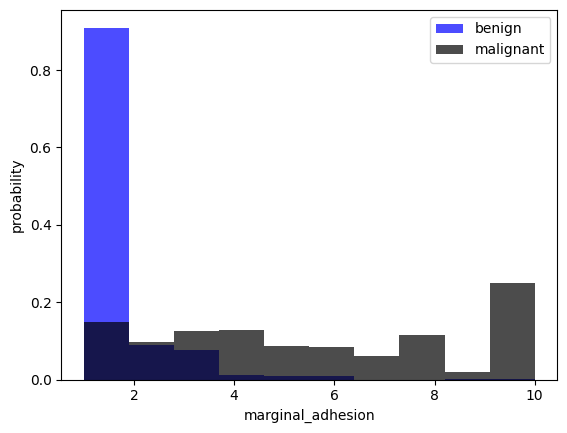

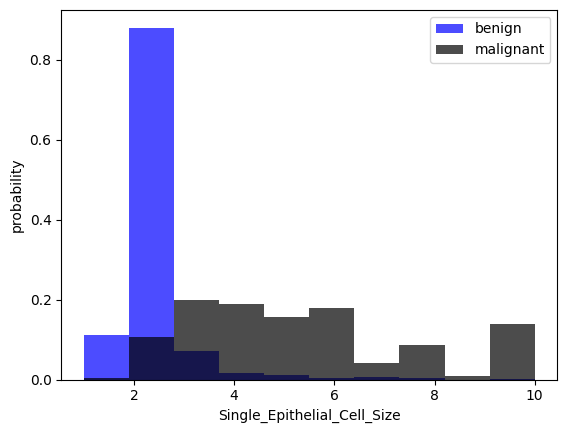

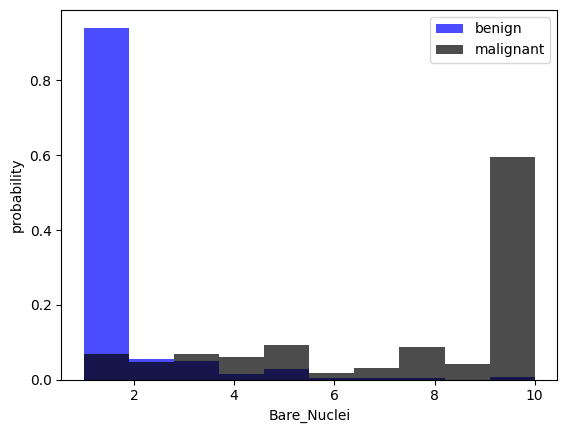

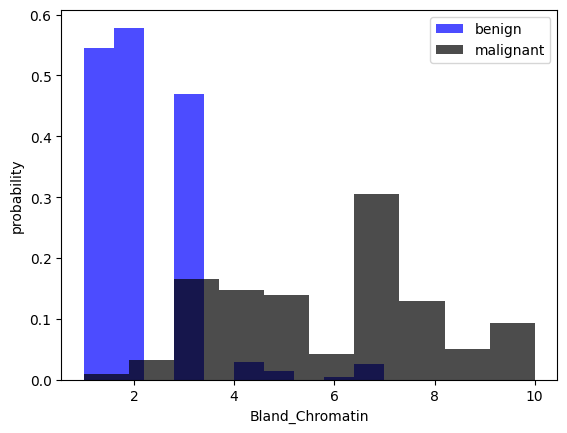

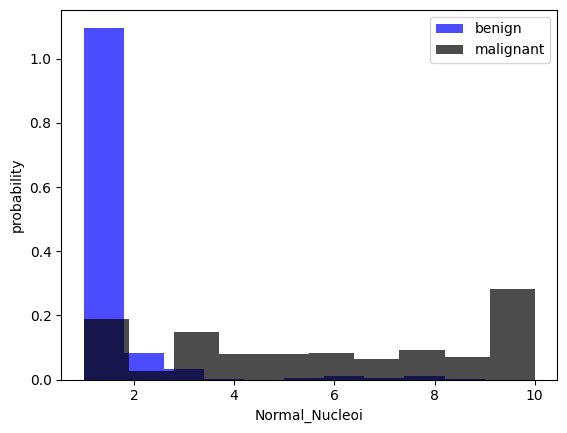

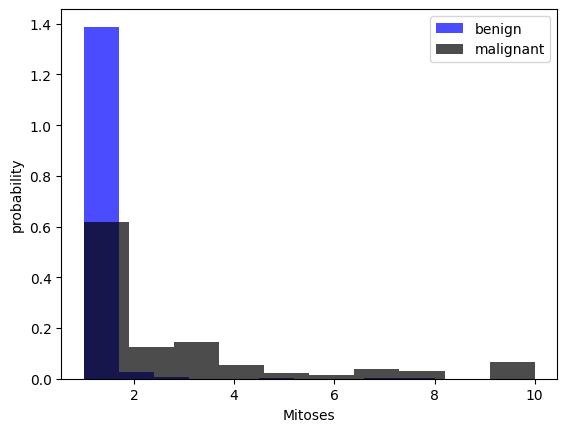

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["Class"]==2][label], color='blue', label='benign', alpha=0.7, density=True)
    plt.hist(df[df["Class"]==4][label], color='black', label='malignant', alpha=0.7, density=True)
    plt.xlabel(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()
  

TRAIN,VALIDATION AND TESTING DATA

In [ ]:
train,validation,test= np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
len(train),len(validation),len(test)


(419, 140, 140)

In [ ]:
train


,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
130,1178580,5,1,3,1,2,1,2,1,1,2
366,95719,6,10,10,10,8,10,7,10,7,4
624,1174009,5,1,1,2,1,1,2,1,1,2
221,1225799,10,6,4,3,10,10,9,10,1,4
61,1115293,1,1,1,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
259,242970,5,7,7,1,5,8,3,4,1,2
310,684955,2,1,1,1,3,1,2,1,1,2
87,1148873,3,6,6,6,5,10,6,8,3,4
124,1175937,5,4,6,7,9,7,8,10,1,4


In [ ]:
len(train[train["Class"]==2])

268

In [ ]:
len(train[train["Class"]==4])

151

Scaling the features of the data to almost same units values 

In [ ]:
def scaling_fun(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  #remember to change the shape of y to make the same dimensions for both x and y
  y= dataframe[dataframe.columns[-1]].values



  scaler = StandardScaler()
  X=scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
  
  data = np.hstack((X,np.reshape(y,(-1,1))))
 
  print(f"x is :{ np.shape(X) } and y is: {np.shape(np.reshape(y,(-1,1)))}")
  return data,X,y

 
   
  

In [ ]:
scaling_fun(train,oversample=True)

x is :(536, 10) and y is: (536, 1)


(array([[ 0.47714483,  0.16409549, -0.73045   , ..., -0.63381039,
         -0.35407902,  2.        ],
        [-3.14673162,  0.51669043,  2.09470585, ...,  2.33157295,
          3.24978596,  4.        ],
        [ 0.46184763,  0.16409549, -0.73045   , ..., -0.63381039,
         -0.35407902,  2.        ],
        ...,
        [ 0.70465175,  1.92707016, -0.4165438 , ..., -0.63381039,
          0.24656515,  4.        ],
        [-3.21142093,  1.92707016,  0.21126862, ..., -0.63381039,
         -0.35407902,  4.        ],
        [-0.63444376,  1.92707016,  0.83908103, ...,  1.67259887,
          1.44785347,  4.        ]]),
 array([[ 0.47714483,  0.16409549, -0.73045   , ..., -0.58960164,
         -0.63381039, -0.35407902],
        [-3.14673162,  0.51669043,  2.09470585, ...,  1.39308766,
          2.33157295,  3.24978596],
        [ 0.46184763,  0.16409549, -0.73045   , ..., -0.58960164,
         -0.63381039, -0.35407902],
        ...,
        [ 0.70465175,  1.92707016, -0.4165438 , ..., -

In [ ]:
train,X_train,y_train = scaling_fun(train,True)
valid,X_valid,y_valid = scaling_fun(validation,False)
test,X_test,y_test = scaling_fun(test,False)

x is :(536, 10) and y is: (536, 1)
x is :(140, 10) and y is: (140, 1)
x is :(140, 10) and y is: (140, 1)


#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        92
           4       0.96      1.00      0.98        48

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



#Naive Bayes rule for model training
*#using bayes rule*

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
bayes_model = GaussianNB()
bayes_model= bayes_model.fit(X_train , y_train )

In [ ]:
y_pred = bayes_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



#Logistic REgression

Trying to fit our given datas as more as possible



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        92
           4       0.98      0.96      0.97        48

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



#SVM(Support Vector Machines)

 our main goal is to divide the classes into 2 part as efficient as possible to seperate the two different groups 

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

